In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from GACPD.GACPD import  GACPD

In [3]:
token_list = []
token_file = 'tokens.txt'

if not os.path.exists("reports"):
    os.mkdir("reports")

if not os.path.exists("src"):
    os.mkdir("src")

if not os.path.exists("cmp"):
    os.mkdir("cmp")

print(os.getcwd())

with open(token_file, 'r') as f:
    for line in f.readlines():
        token_list.append(line.strip('\n'))

/home/gonzalo/Desktop/GACPD


In [4]:
# data = ('1', 'apache/kafka', 'linkedin/kafka', token_list, '', '')
# data = ('2', 'dlindahl/omniauth-cas', 'tduehr/omniauth-cas3', token_list, '', '')
# data = ('3', 'ekohl/metadata_json_deps', 'puppetlabs/dependency_checker', token_list, '', '')
# data = ('4', 'lemurheavy/coveralls-ruby', 'tagliala/coveralls-ruby-reborn', token_list, '', '')
# data = ('5', 'openssh/openssh-portable', 'PowerShell/openssh-portable', token_list, '', '')
# data = ('6', 'openssh/openssh-portable', 'open-quantum-safe/openssl', token_list, '', '') - bad start date
# data = ('7', 'paramiko/paramiko', 'ploxiln/paramiko-ng', token_list, '', '')
# data = ('8', 'jagrosh/MusicBot', 'Cosgy-Dev/JMusicBot-JP', token_list, '', '')
# data = ('9', 'bitcoinj/bitcoinj', 'langerhans/dogecoinj-new', token_list, '', '')
# data = ('10', 'micke/valid_email2', 'wolfemm/email_assessor', token_list, '', '')
# data = ('11', 'NickWaterton/Roomba980-Python', 'pschmitt/roombapy', token_list, '', '')
# data = ('12', 'jekyll/jekyll-admin', 'ashmaroli/jekyll-manager', token_list, '', '')
# data = ('13', 'ledermann/rails-settings', 'huacnlee/rails-settings-cached', token_list, '', '') - bad date
# data = ('14', 'getredash/redash', 'mozilla/redash', token_list, '', '')
# data = ('15', 'DMTF/python-redfish-library', 'HewlettPackard/python-ilorest-library', token_list, '', '')
# data = ('16', 'coderholic/django-cities', 'yourlabs/django-cities-light', token_list, '', '')
# data = ('17', 'spesmilo/electrum', 'Electron-Cash/Electron-Cash', token_list, '', '')
# data = ('18', 'apache/roller', 'gmazza/tightblog', token_list, '', '')
data = ('999', 'apache/kafka', 'linkedin/kafka', token_list, '', '')

In [5]:
example = GACPD(data)

In [6]:
example.get_dates()

The divergence_date of the repository linkedin/kafka is 2022-06-02T17:08:43Z and the cut_off_date is 2025-07-08T04:24:59Z.
The variant2 is ==>
	 Ahead by 471 patches
	 Behind by 6833 patches
Select an interval within the period [2022-06-02T17:08:43Z, 2025-07-08T04:24:59Z] to limit the patches being checked.


In [7]:
# prs_source = example.extractPatches('2022-06-02T17:08:43Z', '2025-04-15T18:26:45Z')
# prs_source = example.extractPatches('2015-10-21T04:20:49Z', '2023-01-27T22:00:31Z')
# prs_source = example.extractPatches('2019-01-04T11:44:36Z', '2025-04-10T14:47:58Z')
# prs_source = example.extractPatches('2017-09-14T16:34:37Z', '2025-03-26T07:25:46Z')
# prs_source = example.extractPatches('2022-10-07T15:25:23Z', '2025-06-07T07:02:07Z')
# prs_source = example.extractPatches('', '2025-05-28T05:48:28Z]') - bad start date
# prs_source = example.extractPatches('2019-06-09T18:16:05Z', '2025-03-17T09:00:24Z')
# prs_source = example.extractPatches('2021-02-26T14:38:47Z', '2025-06-06T07:55:33Z')
# prs_source = example.extractPatches('2019-03-01T09:22:34Z', '2025-01-14T23:02:39Z')
# prs_source = example.extractPatches('2016-02-26T23:50:18Z', '2025-02-26T20:43:14Z')
# prs_source = example.extractPatches('2023-04-17T07:45:18Z', '2025-06-03T07:34:58Z')
# prs_source = example.extractPatches('2017-06-05T05:48:21Z', '2025-02-25T08:50:24Z')
# prs_source = example.extractPatches() # Bad date
# prs_source = example.extractPatches('2020-07-13T17:06:12Z', '2025-05-07T14:47:08Z')
# prs_source = example.extractPatches('2017-03-22T21:58:55Z', '2025-06-02T20:22:53Z')
# prs_source = example.extractPatches('2015-04-02T15:38:38Z', '2025-06-08T12:14:59Z')
# prs_source = example.extractPatches('2024-02-22T11:05:24Z', '2025-06-02T03:12:43Z')
# prs_source = example.extractPatches('2018-04-16T17:41:29Z', '2025-04-13T19:20:02Z')
prs_source = example.extractPatches('2022-06-28T17:08:43Z', '2022-07-03T18:26:45Z')

Extracting patches between 2022-06-28T17:08:43Z and 2022-07-03T18:26:45Z...
https://api.github.com/repos/apache/kafka/pulls?page=1&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=2&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=3&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=4&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=5&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=6&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=7&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=8&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page

In [8]:
example.dfPatches()

,Patch number,Patch title
0,12373,minor: fix static mock usage in taskmetricstest
1,12371,kafka-14035: fix npe caused by missing null ch...
2,12363,hotfix: correct ordering of input buffer and e...
3,12362,kafka-14010: alterpartition request won't retr...


Fetching commit information and files from patches...
Fetch Runtime:  18.346576929092407


Cloning into 'kafka'...
Cloning into 'kafka'...


Repository created at: 2018-08-31T21:32:03Z

Starting classification for apache/kafka, - , linkedin/kafka...
<class 'AttributeError'> GACPD.py 533
<class 'AttributeError'> GACPD.py 533
<class 'AttributeError'> GACPD.py 533
<class 'AttributeError'> GACPD.py 533

Bar plot of the patch classifications for apache/kafka -> linkedin/kafka


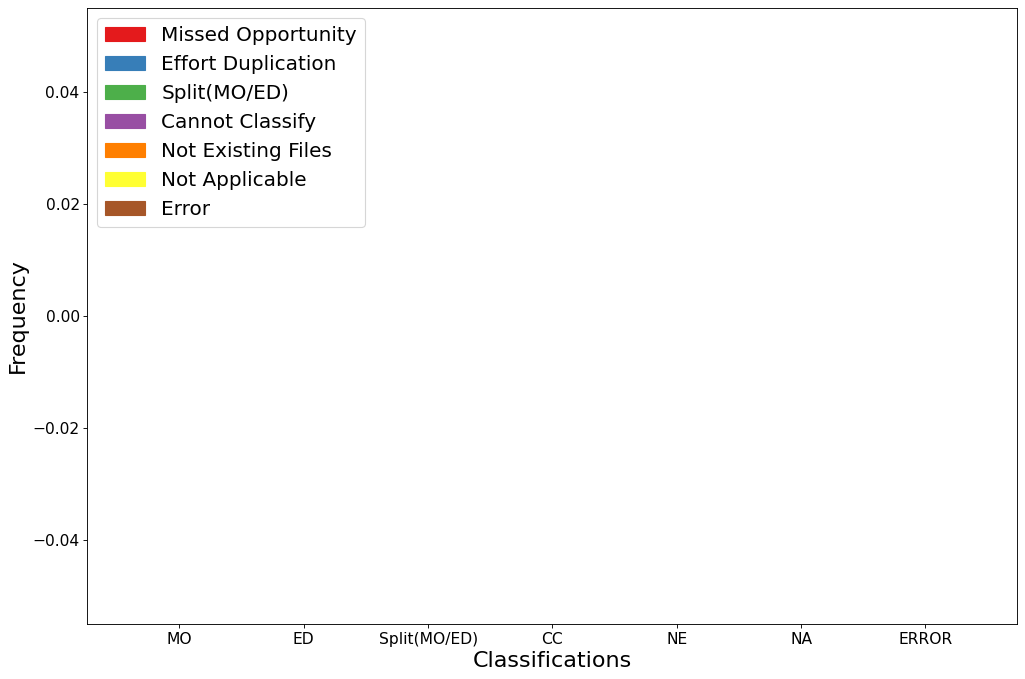

In [9]:
example.runClassification(prs_source)

In [10]:
# example.dfPatchClass().to_csv('results-50-40-30-fullAll.csv')
# example.dfFileClass()
# example.dfFileClass().to_csv('GACPD-50-40-30-fullAll.csv')

In [11]:
for i in range(0, len(example.cycles)):
    print(example.cycles[i])

['streams/src/test/java/org/apache/kafka/streams/state/internals/SegmentIteratorTest.java', 'streams/src/test/java/org/apache/kafka/streams/state/internals/KeyValueSegmentIteratorTest.java', 'streams/src/test/java/org/apache/kafka/streams/state/internals/SegmentIteratorTest.java']
['core/src/main/scala/kafka/server/BrokerToControllerChannelManager.scala', 'core/src/main/scala/kafka/server/BrokerToControllerChannelManagerImpl.scala', 'core/src/main/scala/kafka/server/BrokerToControllerChannelManager.scala']


In [12]:
example.create_dynamic_js()
# TO view results run this on the terminal: python3 -m http.server 8000
# TO end server session just ctrl + c

✅ JavaScript file written to: dynamic_boxes.js
